In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
inspector = inspect (engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent=session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent

('2017-08-23',)

In [ ]:

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data



In [20]:
most_recent_date = dt.datetime.strptime(most_recent[0],'%Y-%m-%d')
most_recent_date


datetime.datetime(2017, 8, 23, 0, 0)

In [21]:
year_ago = most_recent_date-dt.timedelta(days=365)
year_ago

datetime.datetime(2016, 8, 23, 0, 0)

In [22]:
One_year = session.query(measurement.date, measurement.prcp).filter(measurement.date>=year_ago).all() 
One_year

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

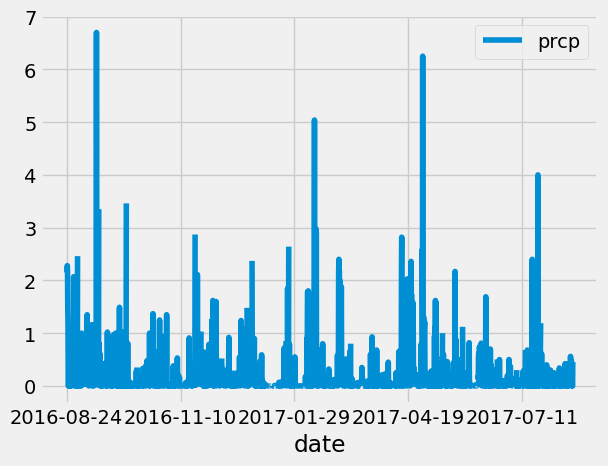

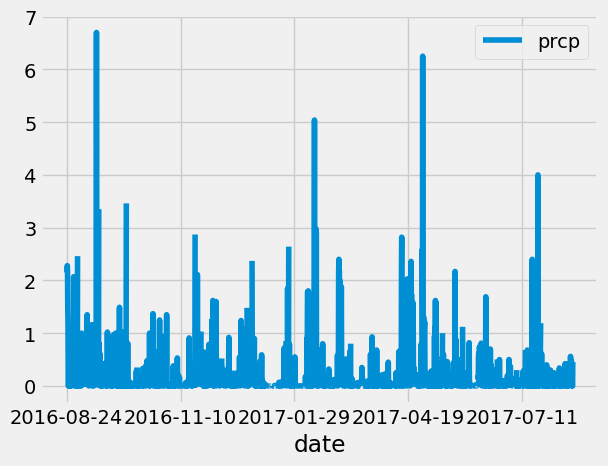

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(One_year,columns=["date", "prcp"])
df.head()
# Sort the dataframe by date
df = df.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x="date", y="prcp") 
plt.show()

In [31]:
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [38]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_data = pd.read_csv('Resources/hawaii_measurements.csv')
summary_stats = precip_data['prcp'].describe()
print(summary_stats)

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number of stations in the dataset

session.query(func.count(station.station)).all()

[(9,)]

In [49]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
measurement.station,(func.count(measurement.station))


(<sqlalchemy.orm.attributes.InstrumentedAttribute at 0x27d7d827100>,
 <sqlalchemy.sql.functions.count at 0x27d00a321b0; count>)

In [65]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [61]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

df.plot.hist(bins=12, title="Temperature vs. Frequency Histogram")


<Axes: title={'center': 'Temperature vs. Frequency Histogram'}, ylabel='Frequency'>

# Close Session

In [27]:
# Close Session
session.close()